In [342]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,recall_score

In [343]:
df=pd.read_csv('Bank_Personal_Loan.csv')
df.sample(10)

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
2644,2645,40,14,28,94061,2,0.8,3,0,0,0,0,0,0
3523,3524,29,4,150,91302,1,0.8,1,0,0,0,0,0,1
4496,4497,51,25,45,95616,4,2.6,1,0,0,0,0,0,0
2807,2808,27,2,129,90009,2,3.3,1,0,0,1,0,0,0
17,18,42,18,81,94305,4,2.4,1,0,0,0,0,0,0
1424,1425,29,3,92,94539,2,1.3,1,287,0,0,0,1,0
2618,2619,23,-3,55,92704,3,2.4,2,145,0,0,0,1,0
512,513,39,14,54,95035,3,3.0,1,108,0,0,0,0,1
2096,2097,55,29,54,95051,2,2.3,3,93,0,0,0,0,0
1606,1607,35,10,33,90266,4,1.7,1,87,0,0,0,1,0


In [344]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [345]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,5000.0,2500.500000,1443.520003,1.0,1250.75,2500.5,3750.25,5000.0
Age,5000.0,45.338400,11.463166,23.0,35.00,45.0,55.00,67.0
Experience,5000.0,20.104600,11.467954,-3.0,10.00,20.0,30.00,43.0
Income,5000.0,73.774200,46.033729,8.0,39.00,64.0,98.00,224.0
ZIP Code,5000.0,93152.503000,2121.852197,9307.0,91911.00,93437.0,94608.00,96651.0
Family,5000.0,2.396400,1.147663,1.0,1.00,2.0,3.00,4.0
CCAvg,5000.0,1.937938,1.747659,0.0,0.70,1.5,2.50,10.0
Education,5000.0,1.881000,0.839869,1.0,1.00,2.0,3.00,3.0
Mortgage,5000.0,56.498800,101.713802,0.0,0.00,0.0,101.00,635.0
Personal Loan,5000.0,0.096000,0.294621,0.0,0.00,0.0,0.00,1.0


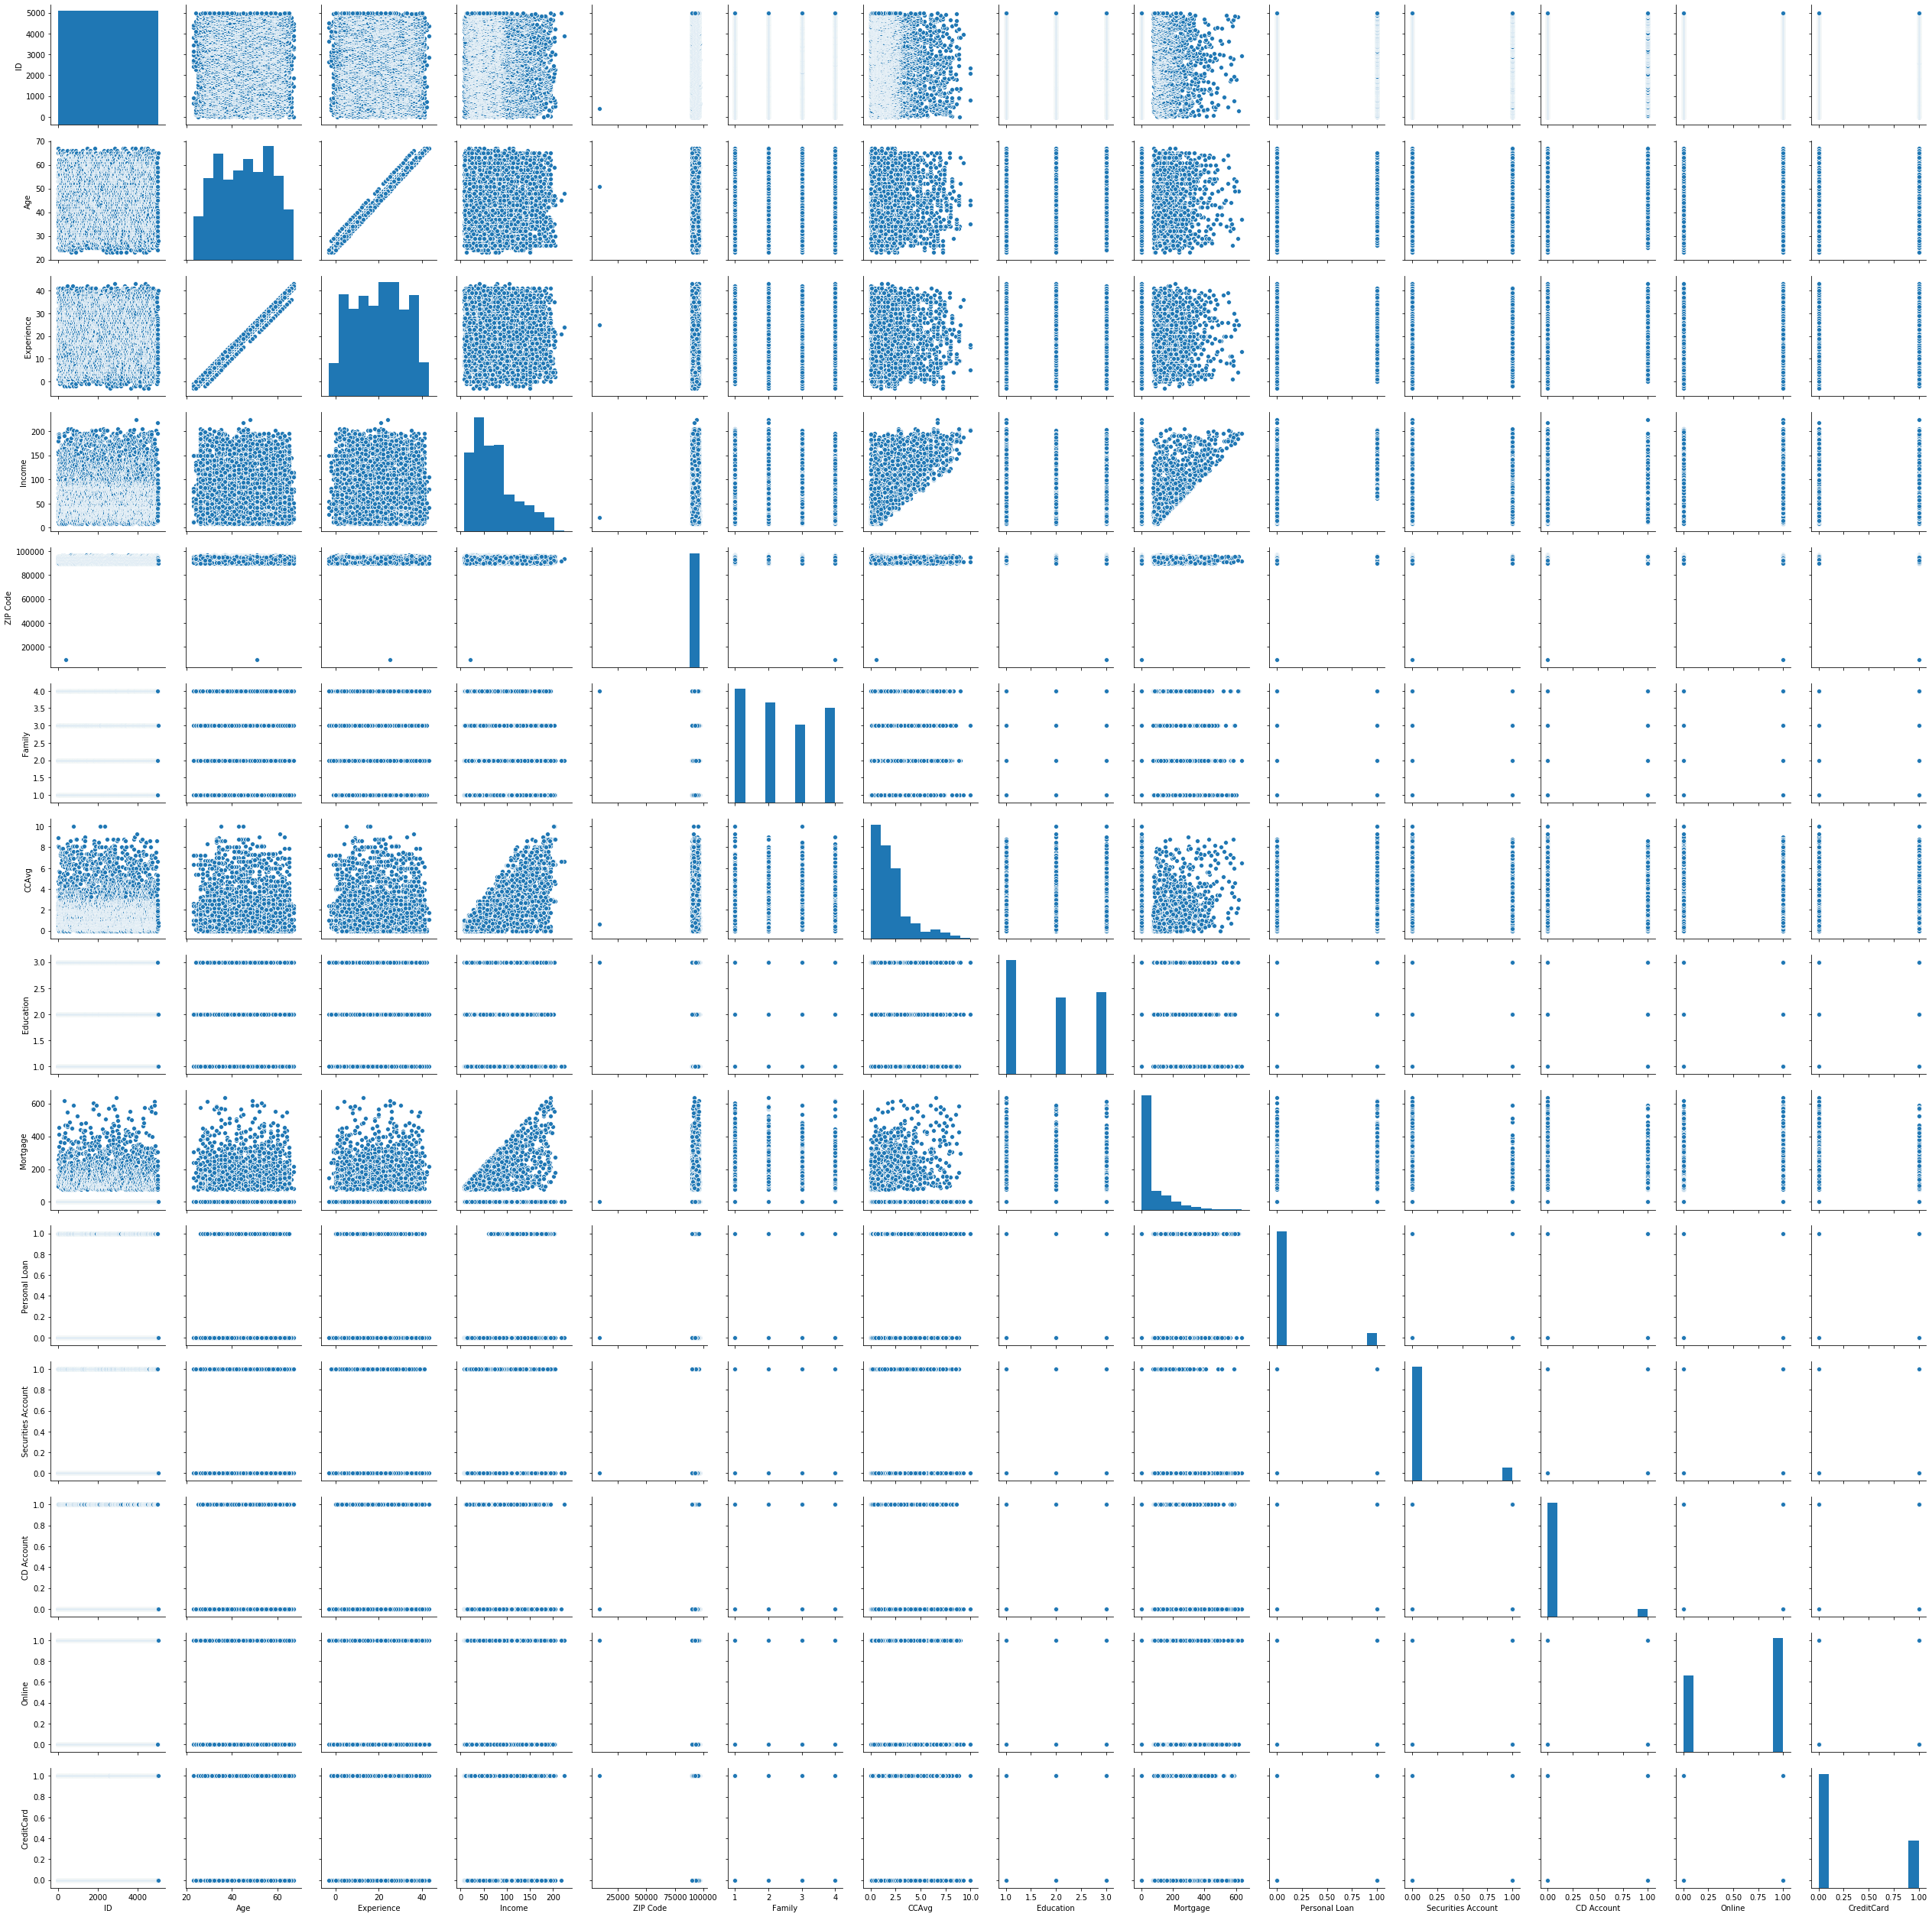

In [265]:
sns.pairplot(df)

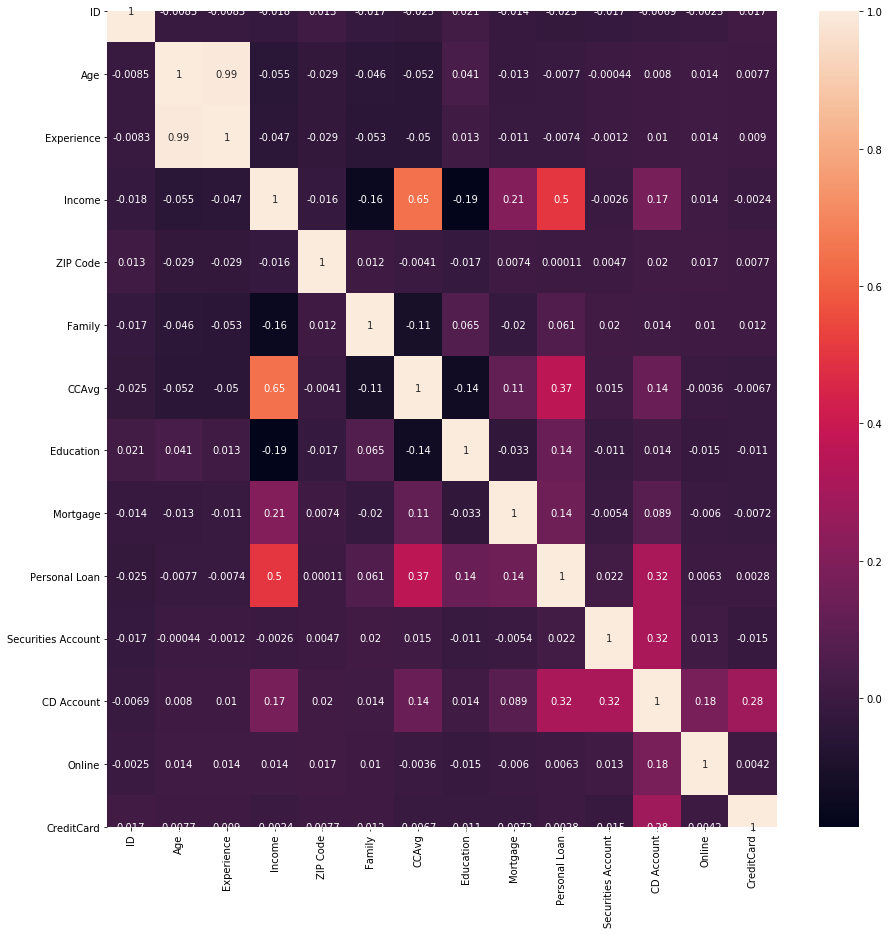

In [266]:
### Correlation shown in graph
plt.figure(figsize=(15,15))
sns.heatmap(df.corr().T,annot=True)

In [346]:
### Correlation for Personla Loan vs all columns
df.corr().loc['Personal Loan']

ID                   -0.024801
Age                  -0.007726
Experience           -0.007413
Income                0.502462
ZIP Code              0.000107
Family                0.061367
CCAvg                 0.366889
Education             0.136722
Mortgage              0.142095
Personal Loan         1.000000
Securities Account    0.021954
CD Account            0.316355
Online                0.006278
CreditCard            0.002802
Name: Personal Loan, dtype: float64

### CHECKING FOR OUTLIERS

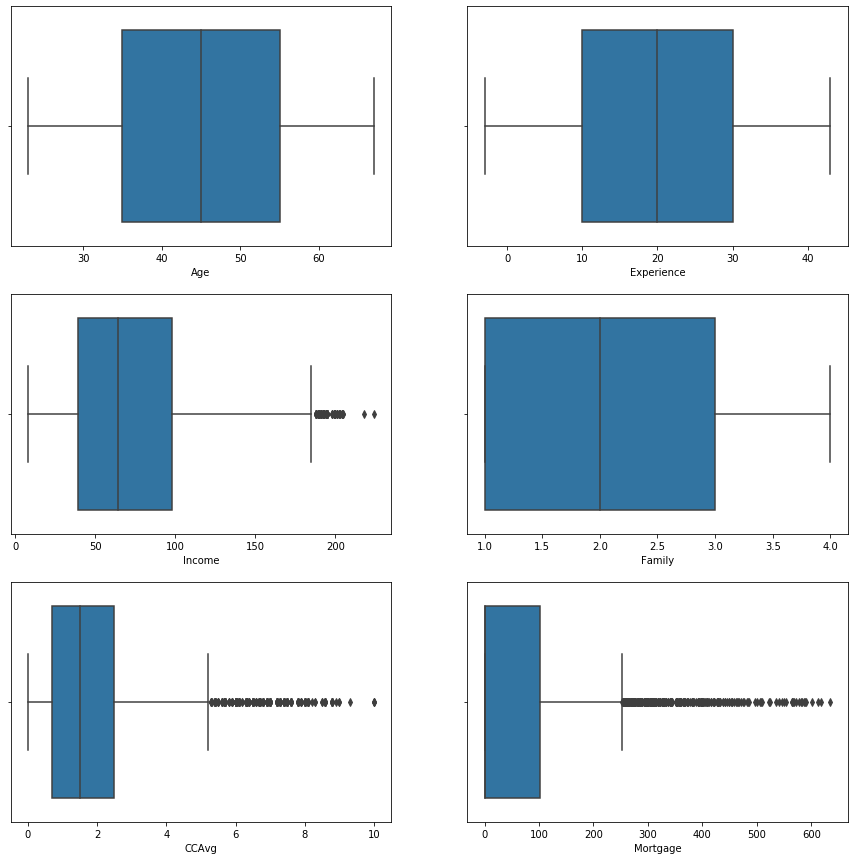

In [268]:
plt.figure(figsize=(15,15))
plt.subplot(3,2,1)
sns.boxplot(df['Age'])
plt.subplot(3,2,2)
sns.boxplot(df['Experience'])
plt.subplot(3,2,3)
sns.boxplot(df['Income'])
plt.subplot(3,2,4)
sns.boxplot(df['Family'])
plt.subplot(3,2,5)
sns.boxplot(df['CCAvg'])
plt.subplot(3,2,6)
sns.boxplot(df['Mortgage'])

In [347]:
### Dropping values above the IQR 
IQR=df["Income"].quantile(0.75)+1.5*(df["Income"].quantile(0.75) - df["Income"].quantile(0.25))
for i in df['Income']:
    if(i > IQR):
        df['Income']=df['Income'].replace(i,IQR)

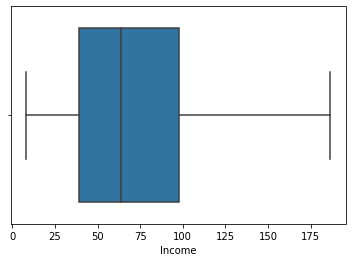

In [348]:
### Now checking for the presence of Outlier in Income column
sns.boxplot(df['Income'])

In [349]:
### Taking Backup before clensing
df_bkp=df.copy(deep=True)

In [350]:
### Now Cleaning Experience Column in dataframe
print('Experience count less than 0 :',df[df['Experience']<0]['Experience'].count())
def exp_clensing(x):
    if x<0:
        return int(df.Experience.median())
    else:
        return x
df['Experience']=df['Experience'].apply(exp_clensing)

Experience count less than 0 : 52


In [351]:
### Experience count after clensing the column
print('Experience count less than 0 :',df[df['Experience']<0]['Experience'].count())
#df_bkp

Experience count less than 0 : 0


In [352]:
df['Personal Loan'].value_counts()

0    4520
1     480
Name: Personal Loan, dtype: int64

### AGE

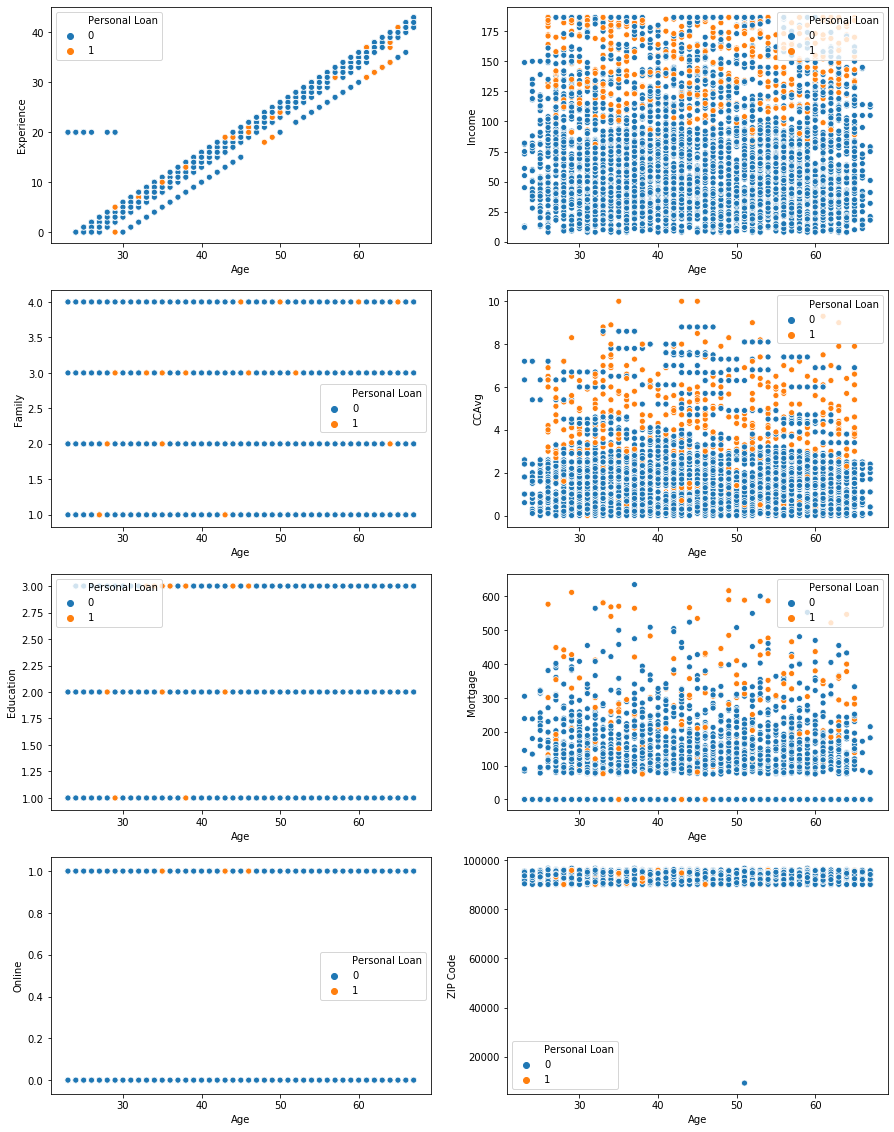

In [151]:
plt.figure(figsize=(15,20))
plt.subplot(4,2,1)
sns.scatterplot(x='Age',y='Experience',data=df,hue='Personal Loan')
plt.subplot(4,2,2)
sns.scatterplot(x='Age',y='Income',data=df,hue='Personal Loan')
plt.subplot(4,2,3)
sns.scatterplot(x='Age',y='Family',data=df,hue='Personal Loan')
plt.subplot(4,2,4)
sns.scatterplot(x='Age',y='CCAvg',data=df,hue='Personal Loan')
plt.subplot(4,2,5)
sns.scatterplot(x='Age',y='Education',data=df,hue='Personal Loan')
plt.subplot(4,2,6)
sns.scatterplot(x='Age',y='Mortgage',data=df,hue='Personal Loan')
plt.subplot(4,2,7)
sns.scatterplot(x='Age',y='Online',data=df,hue='Personal Loan')
plt.subplot(4,2,8)
sns.scatterplot(x='Age',y='ZIP Code',data=df,hue='Personal Loan')

### EXPERIENCE

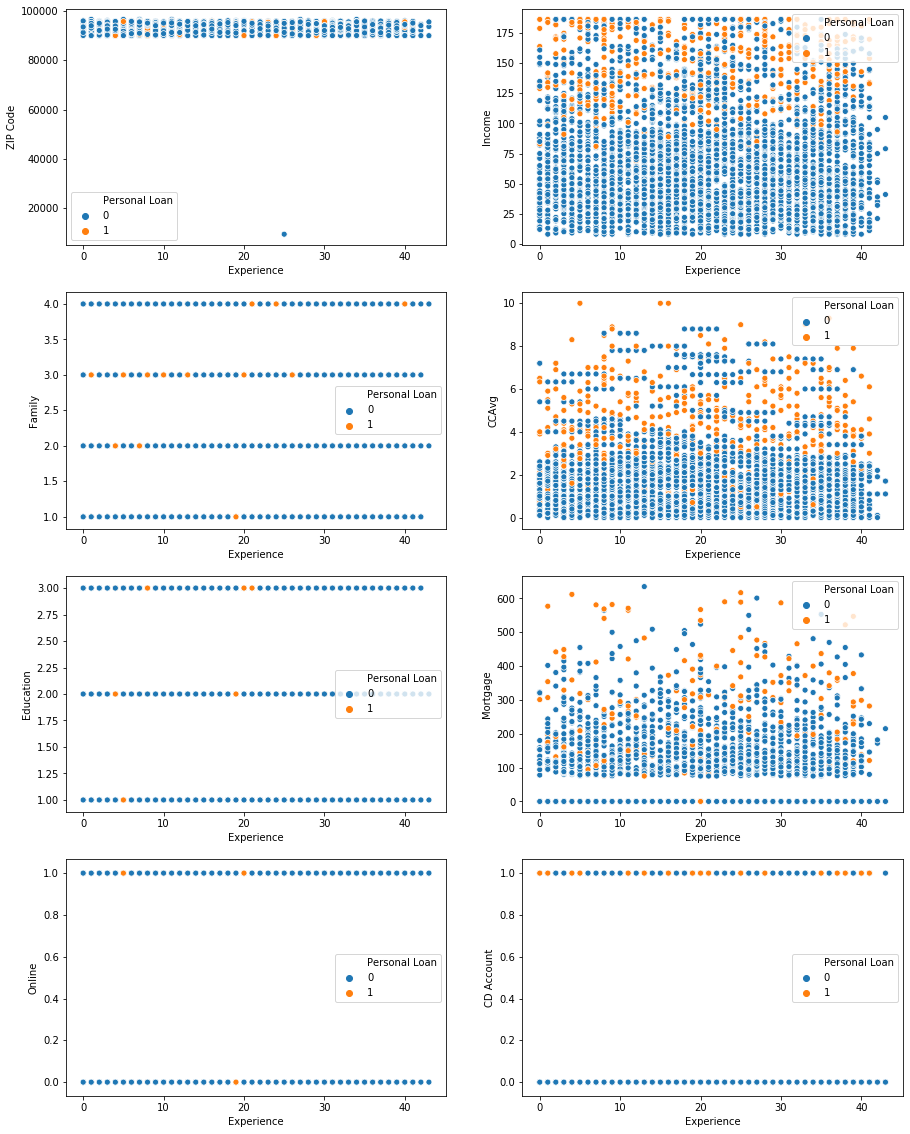

In [152]:
plt.figure(figsize=(15,20))
plt.subplot(4,2,1)
sns.scatterplot(x='Experience',y='ZIP Code',data=df,hue='Personal Loan')
plt.subplot(4,2,2)
sns.scatterplot(x='Experience',y='Income',data=df,hue='Personal Loan')
plt.subplot(4,2,3)
sns.scatterplot(x='Experience',y='Family',data=df,hue='Personal Loan')
plt.subplot(4,2,4)
sns.scatterplot(x='Experience',y='CCAvg',data=df,hue='Personal Loan')
plt.subplot(4,2,5)
sns.scatterplot(x='Experience',y='Education',data=df,hue='Personal Loan')
plt.subplot(4,2,6)
sns.scatterplot(x='Experience',y='Mortgage',data=df,hue='Personal Loan')
plt.subplot(4,2,7)
sns.scatterplot(x='Experience',y='Online',data=df,hue='Personal Loan')
plt.subplot(4,2,8)
sns.scatterplot(x='Experience',y='CD Account',data=df,hue='Personal Loan')

### INCOME

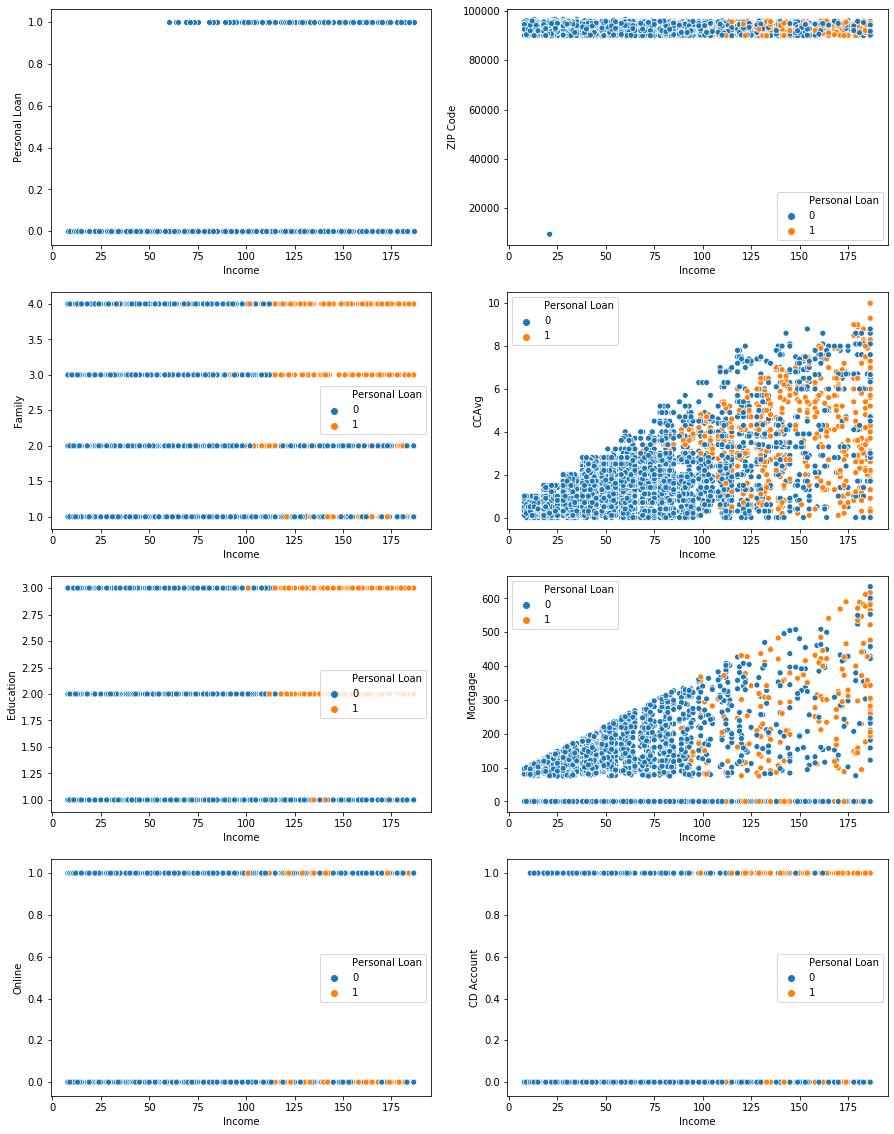

In [153]:
plt.figure(figsize=(15,20))
plt.subplot(4,2,1)
sns.scatterplot(x='Income',y='Personal Loan',data=df)
plt.subplot(4,2,2)
sns.scatterplot(x='Income',y='ZIP Code',data=df,hue='Personal Loan')
plt.subplot(4,2,3)
sns.scatterplot(x='Income',y='Family',data=df,hue='Personal Loan')
plt.subplot(4,2,4)
sns.scatterplot(x='Income',y='CCAvg',data=df,hue='Personal Loan')
plt.subplot(4,2,5)
sns.scatterplot(x='Income',y='Education',data=df,hue='Personal Loan')
plt.subplot(4,2,6)
sns.scatterplot(x='Income',y='Mortgage',data=df,hue='Personal Loan')
plt.subplot(4,2,7)
sns.scatterplot(x='Income',y='Online',data=df,hue='Personal Loan')
plt.subplot(4,2,8)
sns.scatterplot(x='Income',y='CD Account',data=df,hue='Personal Loan')

### ZIP CODE 

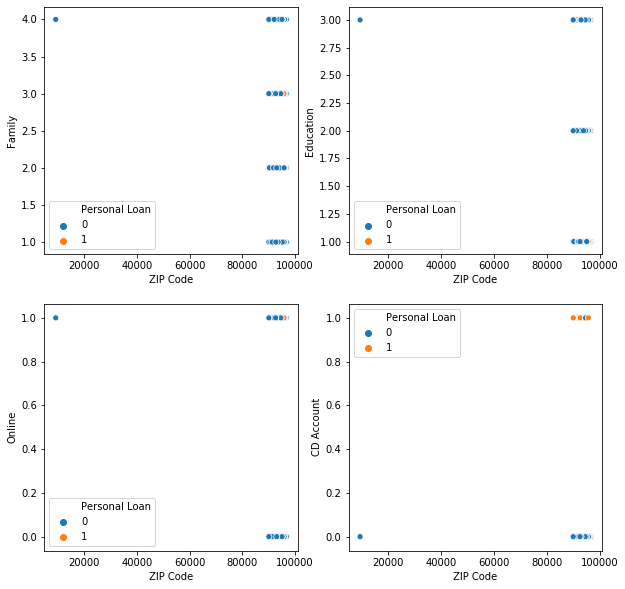

In [8]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.scatterplot(x='ZIP Code',y='Family',data=df,hue='Personal Loan',)
plt.subplot(2,2,2)
sns.scatterplot(x='ZIP Code',y='Education',data=df,hue='Personal Loan')
plt.subplot(2,2,3)
sns.scatterplot(x='ZIP Code',y='Online',data=df,hue='Personal Loan')
plt.subplot(2,2,4)
sns.scatterplot(x='ZIP Code',y='CD Account',data=df,hue='Personal Loan')

### FAMILY

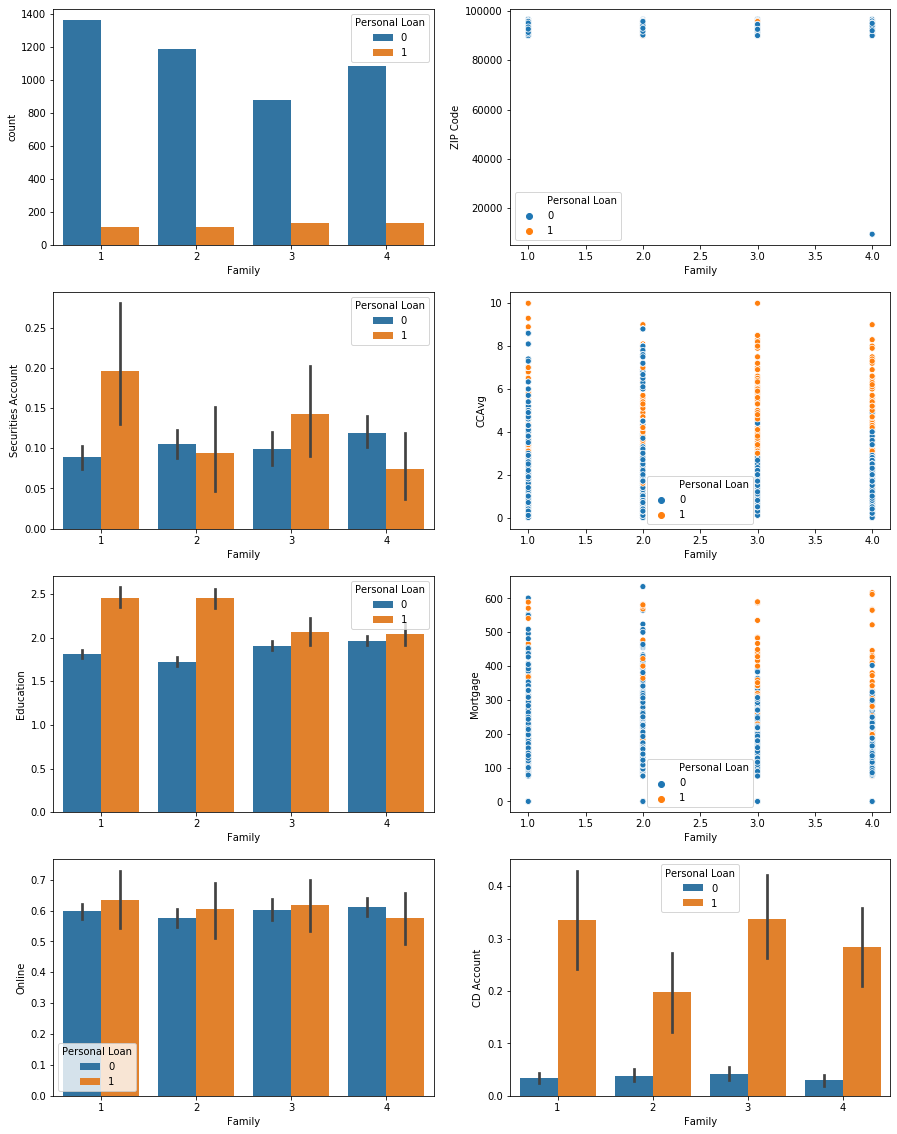

In [28]:
plt.figure(figsize=(15,20))
plt.subplot(4,2,1)
sns.countplot(x='Family',data=df,hue='Personal Loan',)
plt.subplot(4,2,2)
sns.scatterplot(x='Family',y='ZIP Code',data=df,hue='Personal Loan')
plt.subplot(4,2,3)
sns.barplot(x='Family',y='Securities Account',data=df,hue='Personal Loan')
plt.subplot(4,2,4)
sns.scatterplot(x='Family',y='CCAvg',data=df,hue='Personal Loan')
plt.subplot(4,2,5)
sns.barplot(x='Family',y='Education',data=df,hue='Personal Loan')
plt.subplot(4,2,6)
sns.scatterplot(x='Family',y='Mortgage',data=df,hue='Personal Loan')
plt.subplot(4,2,7)
sns.barplot(x='Family',y='Online',data=df,hue='Personal Loan')
plt.subplot(4,2,8)
sns.barplot(x='Family',y='CD Account',data=df,hue='Personal Loan')

### CREDIT CARD AVERAGE

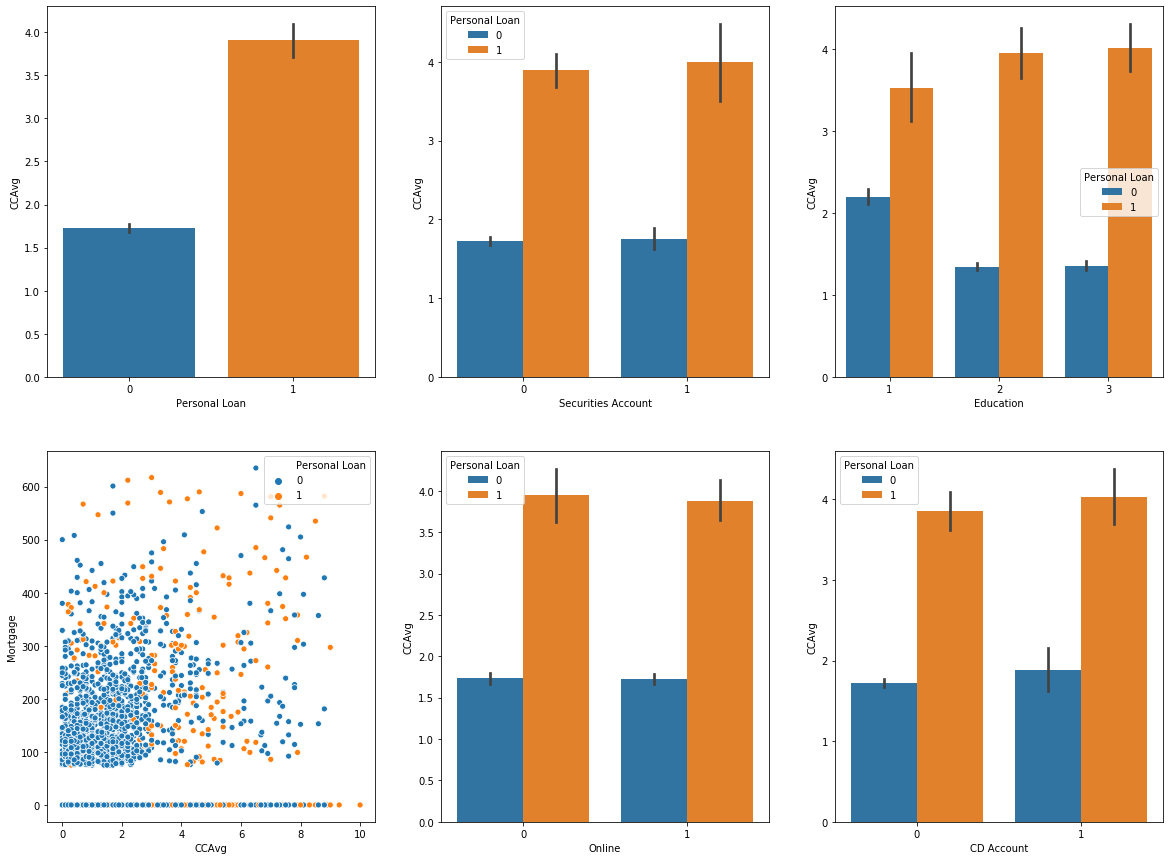

In [40]:
plt.figure(figsize=(20,15))
plt.subplot(2,3,1)
sns.barplot(y='CCAvg',data=df,x='Personal Loan')
plt.subplot(2,3,2)
sns.barplot(y='CCAvg',x='Securities Account',data=df,hue='Personal Loan')
plt.subplot(2,3,3)
sns.barplot(y='CCAvg',x='Education',data=df,hue='Personal Loan')
plt.subplot(2,3,4)
sns.scatterplot(x='CCAvg',y='Mortgage',data=df,hue='Personal Loan')
plt.subplot(2,3,5)
sns.barplot(y='CCAvg',x='Online',data=df,hue='Personal Loan')
plt.subplot(2,3,6)
sns.barplot(y='CCAvg',x='CD Account',data=df,hue='Personal Loan')

### EDUCATION

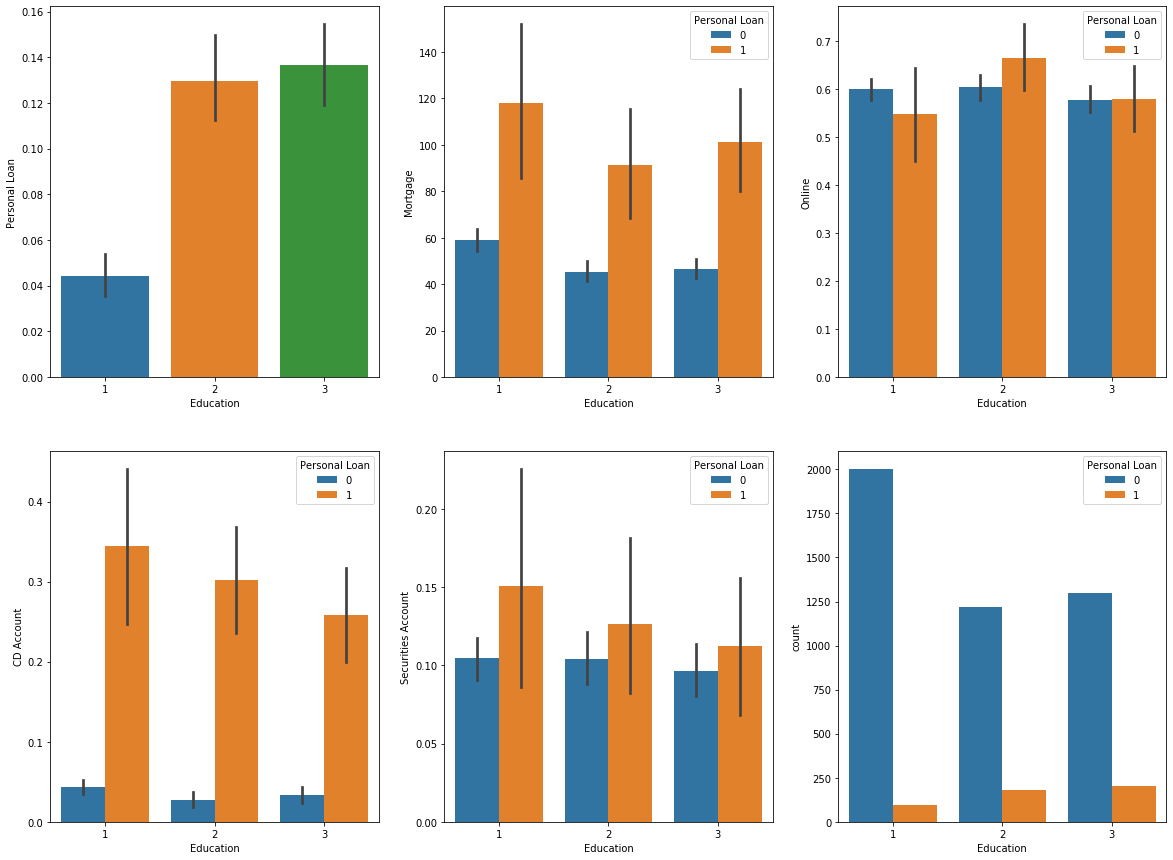

In [43]:
plt.figure(figsize=(20,15))
plt.subplot(2,3,1)
sns.barplot(x='Education',y='Personal Loan',data=df)
plt.subplot(2,3,2)
sns.barplot(x='Education',y='Mortgage',data=df,hue='Personal Loan')
plt.subplot(2,3,3)
sns.barplot(x='Education',y='Online',data=df,hue='Personal Loan')
plt.subplot(2,3,4)
sns.barplot(x='Education',y='CD Account',data=df,hue='Personal Loan')
plt.subplot(2,3,5)
sns.barplot(x='Education',y='Securities Account',data=df,hue='Personal Loan')
plt.subplot(2,3,6)
sns.countplot(x='Education',data=df,hue='Personal Loan')

### MORTGAGE

Text(0.5, 1.0, 'MORTGAGE ANALYSIS')

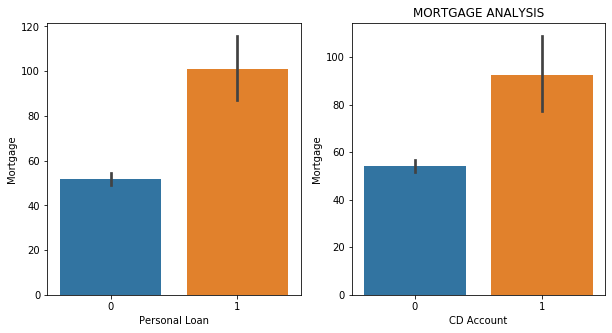

In [9]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.barplot(y='Mortgage',x='Personal Loan',data=df)
plt.subplot(1,2,2)
sns.barplot(y='Mortgage',x='CD Account',data=df)
plt.title('MORTGAGE ANALYSIS',loc='center')

### PERSONAL LOAN

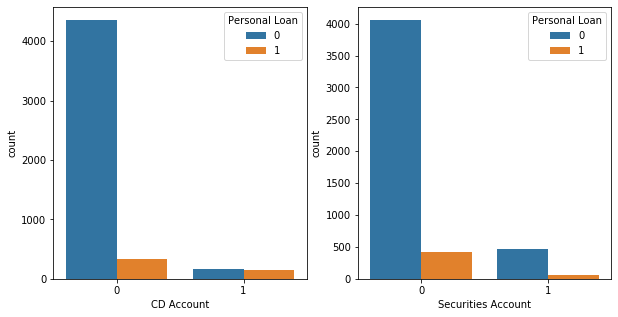

In [13]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(hue='Personal Loan',x='CD Account',data=df)
plt.subplot(1,2,2)
sns.countplot(hue='Personal Loan',x='Securities Account',data=df)

### SECURITIES ACCOUNT

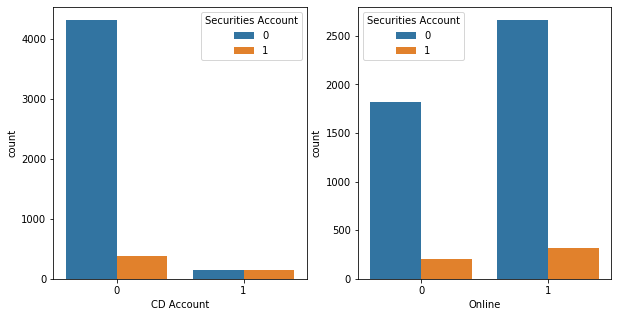

In [15]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.countplot(hue='Securities Account',x='CD Account',data=df)
plt.subplot(1,2,2)
sns.countplot(hue='Securities Account',x='Online',data=df)

### CREDIT CARD 

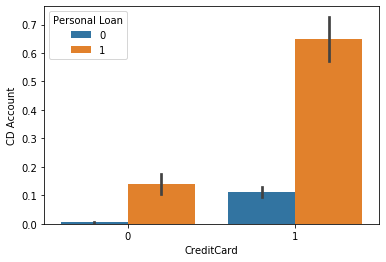

In [18]:
sns.barplot(x='CreditCard',y='CD Account',data=df,hue='Personal Loan')

## EDA REPORT 

### From Heatmap graph we can see Income,CCAvg,CC Account has high correlation with Personal Loan(dependent variable) and other attributes like age,experience influences the dependent variable 

### SPLITING TRAIN AND TEST SET

In [310]:
df_X=df.drop(['ID','ZIP Code','Personal Loan'],axis=1)
X=df_X.values
y=df['Personal Loan']
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.3,random_state=3)

In [284]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
ID                    5000 non-null int64
Age                   5000 non-null int64
Experience            5000 non-null int64
Income                5000 non-null int64
ZIP Code              5000 non-null int64
Family                5000 non-null int64
CCAvg                 5000 non-null float64
Education             5000 non-null int64
Mortgage              5000 non-null int64
Personal Loan         5000 non-null int64
Securities Account    5000 non-null int64
CD Account            5000 non-null int64
Online                5000 non-null int64
CreditCard            5000 non-null int64
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [311]:
from scipy.stats import zscore
X_scaled=zscore(df_X)
x_train1,x_test1,y_train1,y_test1=train_test_split(X_scaled,y,test_size=.3,random_state=3)

### LOGISTIC REGRESSION

In [312]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression(solver='liblinear')
lg.fit(x_train,y_train)
print('Training set score :',lg.score(x_train,y_train))
y_lg=lg.predict(x_test)
print('Test set score :',lg.score(x_test,y_test))

Training set score : 0.9534285714285714
Test set score : 0.9453333333333334


In [313]:
#accuracy_score(y_test,np.round(y_lg))
print(classification_report(y_test,y_lg))

              precision    recall  f1-score   support

           0       0.96      0.98      0.97      1349
           1       0.79      0.62      0.69       151

    accuracy                           0.95      1500
   macro avg       0.88      0.80      0.83      1500
weighted avg       0.94      0.95      0.94      1500



In [314]:
print(accuracy_score(y_test,y_lg))
print(recall_score(y_test,y_lg))

0.9453333333333334
0.6158940397350994


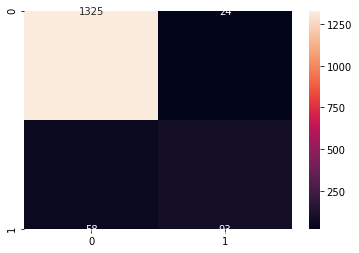

In [315]:
cm_lg=confusion_matrix(y_test,y_lg)
plt.figure()
sns.heatmap(cm_lg,annot=True,fmt='1')

### NAIVE BAYES CLASSIFICATION

In [316]:
from sklearn.naive_bayes import GaussianNB
nb=GaussianNB()
nb.fit(x_train,y_train)
print('Training set score :',nb.score(x_train,y_train))
y_nb=nb.predict(x_test)
print('Test set score :',nb.score(x_test,y_test))
print('Accuracy Score :',accuracy_score(y_test,y_nb))

Training set score : 0.8848571428571429
Test set score : 0.886
Accuracy Score : 0.886


In [317]:
print(classification_report(y_test,y_nb))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94      1349
           1       0.45      0.64      0.53       151

    accuracy                           0.89      1500
   macro avg       0.71      0.77      0.73      1500
weighted avg       0.91      0.89      0.89      1500



In [318]:
print(accuracy_score(y_test,y_nb))
print(recall_score(y_test,y_nb))

0.886
0.6357615894039735


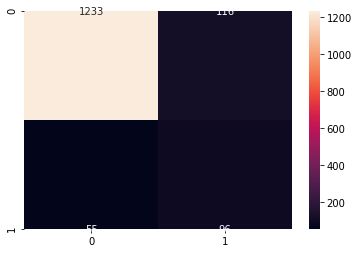

In [319]:
cm_nb=confusion_matrix(y_test,y_nb)
plt.figure()
sns.heatmap(cm_nb,annot=True,fmt='1')

### NAIVE BAYES CLASSIFICATION AFTER SCALING

In [320]:
nb.fit(x_train1,y_train1)
print('Training set score :',nb.score(x_train1,y_train1))
y_nb1=nb.predict(x_test1)
print('Test set score :',nb.score(x_test1,y_test1))

Training set score : 0.8848571428571429
Test set score : 0.886


In [321]:
print(classification_report(y_test,y_nb1))

              precision    recall  f1-score   support

           0       0.96      0.91      0.94      1349
           1       0.45      0.64      0.53       151

    accuracy                           0.89      1500
   macro avg       0.71      0.77      0.73      1500
weighted avg       0.91      0.89      0.89      1500



In [322]:
print(accuracy_score(y_test,y_nb1))
print(recall_score(y_test,y_nb1))

0.886
0.6357615894039735


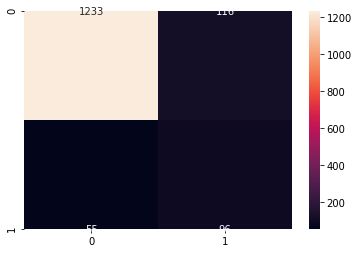

In [323]:
cm_nb1=confusion_matrix(y_test,y_nb)
plt.figure()
sns.heatmap(cm_nb1,annot=True,fmt='1')

### KNN CLASSIFICATION

In [324]:
from sklearn.neighbors import KNeighborsClassifier
scores_train=[]
scores_test=[]
for i in range(1,56,2):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    print('Training score :',i,'-->',knn.score(x_train,y_train))
    scores_train.append(knn.score(x_train,y_train))
    scores_test.append(knn.score(x_test,y_test))
    print('Test score :',i,'-->',knn.score(x_test,y_test))
    print('----------------------')
    print('----------------------')

Training score : 1 --> 1.0
Test score : 1 --> 0.9106666666666666
----------------------
----------------------
Training score : 3 --> 0.9502857142857143
Test score : 3 --> 0.916
----------------------
----------------------
Training score : 5 --> 0.9348571428571428
Test score : 5 --> 0.91
----------------------
----------------------
Training score : 7 --> 0.9294285714285714
Test score : 7 --> 0.908
----------------------
----------------------
Training score : 9 --> 0.9265714285714286
Test score : 9 --> 0.912
----------------------
----------------------
Training score : 11 --> 0.9217142857142857
Test score : 11 --> 0.9073333333333333
----------------------
----------------------
Training score : 13 --> 0.922
Test score : 13 --> 0.9046666666666666
----------------------
----------------------
Training score : 15 --> 0.9185714285714286
Test score : 15 --> 0.902
----------------------
----------------------
Training score : 17 --> 0.9154285714285715
Test score : 17 --> 0.901333333333333

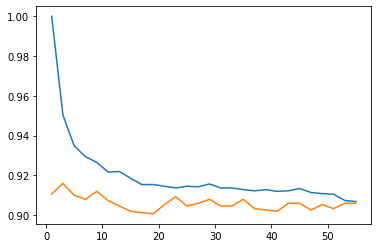

In [325]:
plt.figure()
t=[i for i in range(1,56,2)]
plt.plot(t,scores_train)
plt.plot(t,scores_test)    

In [326]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(x_train,y_train)
print('Training score :',knn.score(x_train,y_train))
y_knn=knn.predict(x_test)
print('Test score :',knn.score(x_test,y_test))

Training score : 0.9502857142857143
Test score : 0.916


In [328]:
print(accuracy_score(y_test,y_knn))
print(recall_score(y_test,y_knn))

0.916
0.44370860927152317


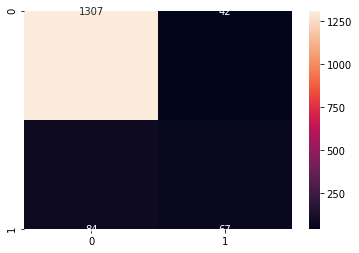

In [329]:
cm_knn=confusion_matrix(y_test,y_knn)
plt.figure()
sns.heatmap(cm_knn,annot=True,fmt='1')

### SUPPORT VECTOR CLASSIFICATION

In [330]:
from sklearn.svm import SVC
sc=SVC(C=1.0,gamma=0.025,kernel='linear')
sc.fit(x_train,y_train)
print('Training set score :',sc.score(x_train,y_train))
y_sc=sc.predict(x_test)
print('Test set score :',sc.score(x_test,y_test))

Training set score : 0.9557142857142857
Test set score : 0.954


In [331]:
print(classification_report(y_sc,y_test))

              precision    recall  f1-score   support

           0       0.99      0.96      0.97      1396
           1       0.62      0.89      0.73       104

    accuracy                           0.95      1500
   macro avg       0.80      0.93      0.85      1500
weighted avg       0.97      0.95      0.96      1500



In [332]:
print(accuracy_score(y_test,y_sc))
print(recall_score(y_test,y_sc))

0.954
0.6158940397350994


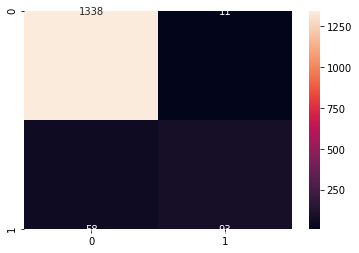

In [333]:
cm_sc=confusion_matrix(y_test,y_sc)
plt.figure()
sns.heatmap(cm_sc,annot=True,fmt='1')

###   

## FINALY REPORT 

In [337]:
print('LOGISTIC REGRESSION          ---->',94.5,"%")
print('NAIVE BAYES CLASSIFICATION   ---->',88.6,"%")
print('KNN NEIGHBOUR CLASSIFICATION ---->',91.6,"%")
print('SUPPORT VECTOR MACHINE       ---->',95.4,"%")

LOGISTIC REGRESSION          ----> 94.5 %
NAIVE BAYES CLASSIFICATION   ----> 88.6 %
KNN NEIGHBOUR CLASSIFICATION ----> 91.6 %
SUPPORT VECTOR MACHINE       ----> 95.4 %


## CONCLUSION

### As per Test dataset accuracy , We can use either Logistic regression and Support Vector Machine for classifying the customer for buying personal Loans